Car.png


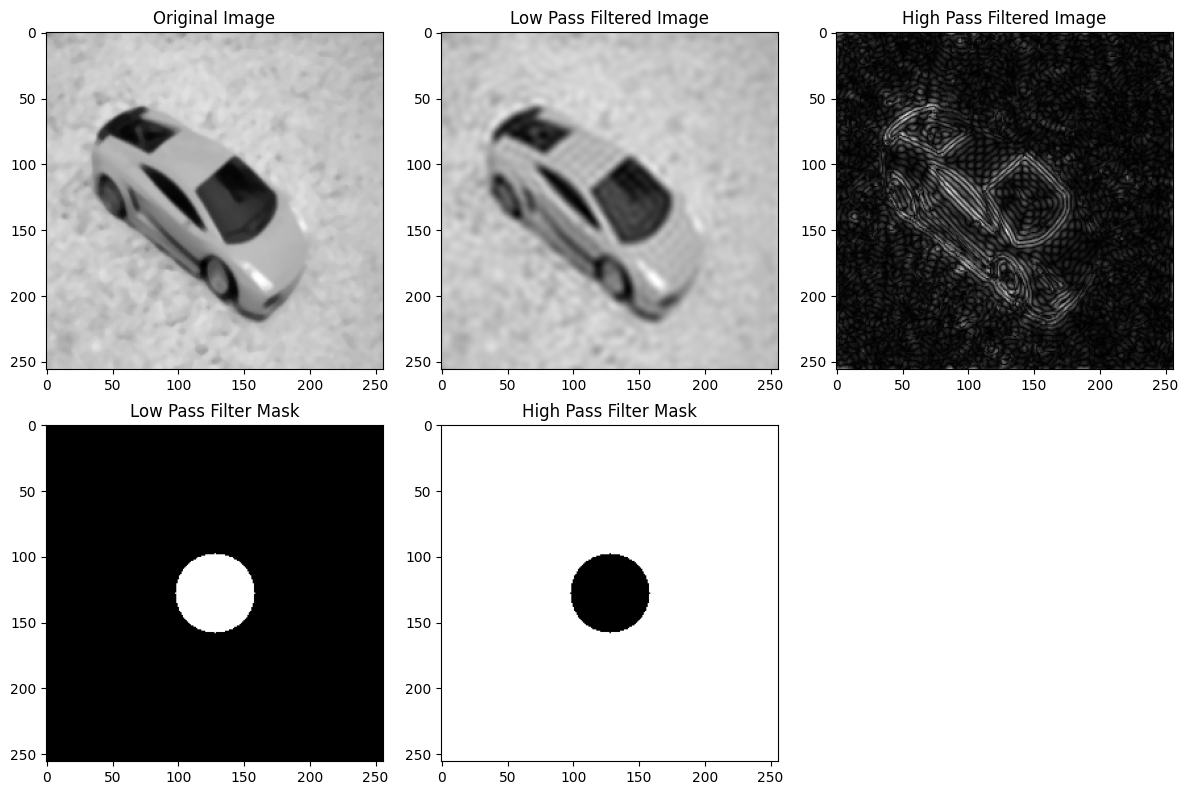

Geometrical_Shapes.png


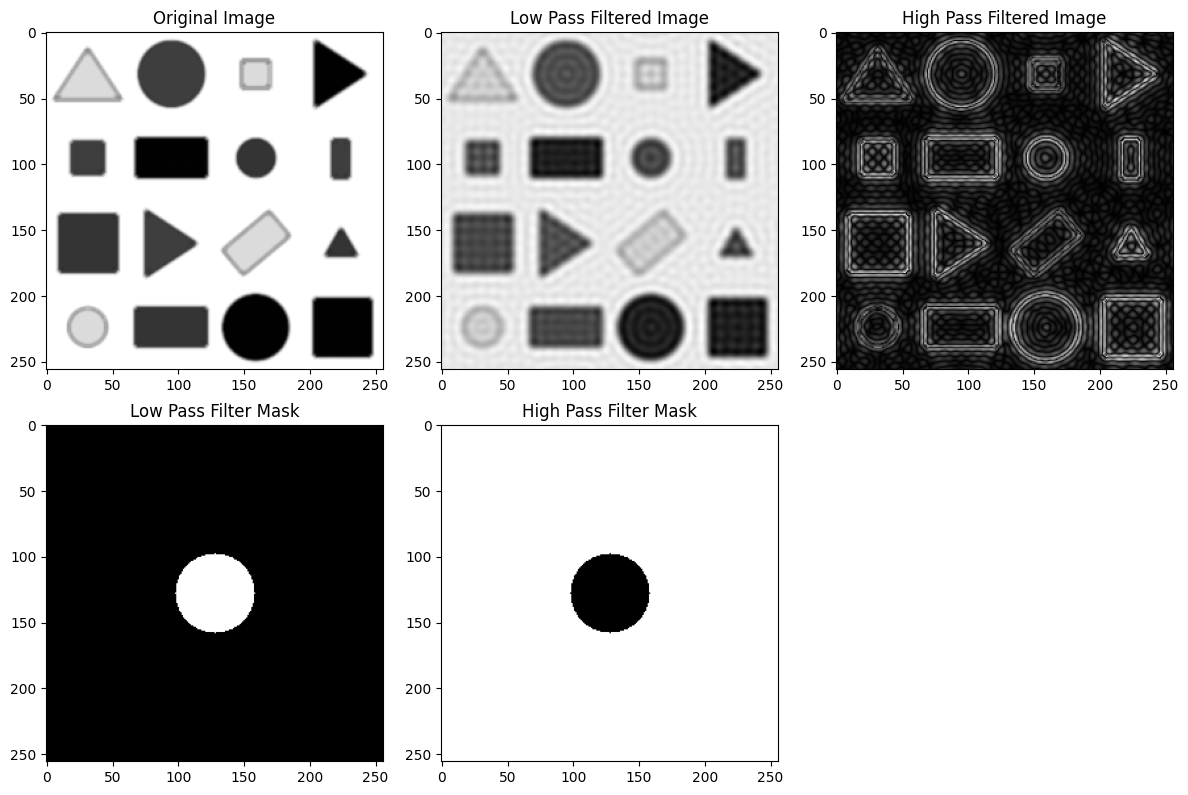

SchoolBus.png


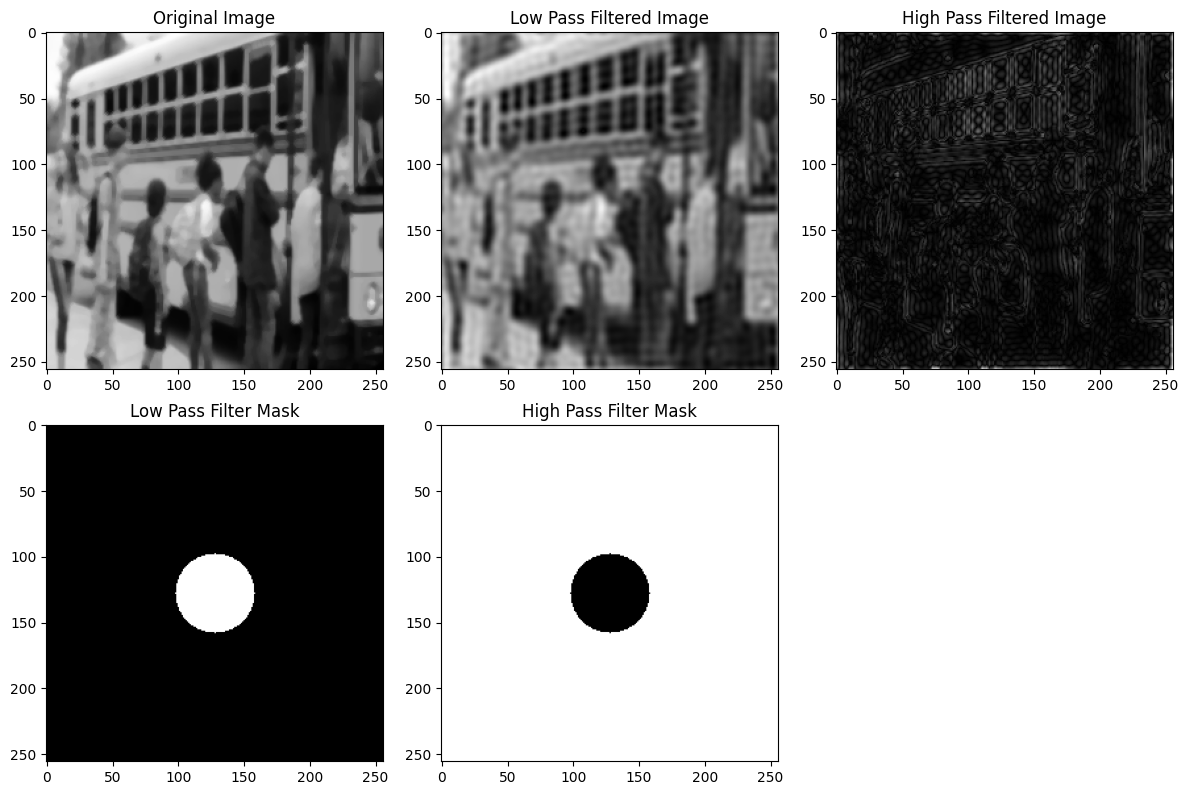

Text.png


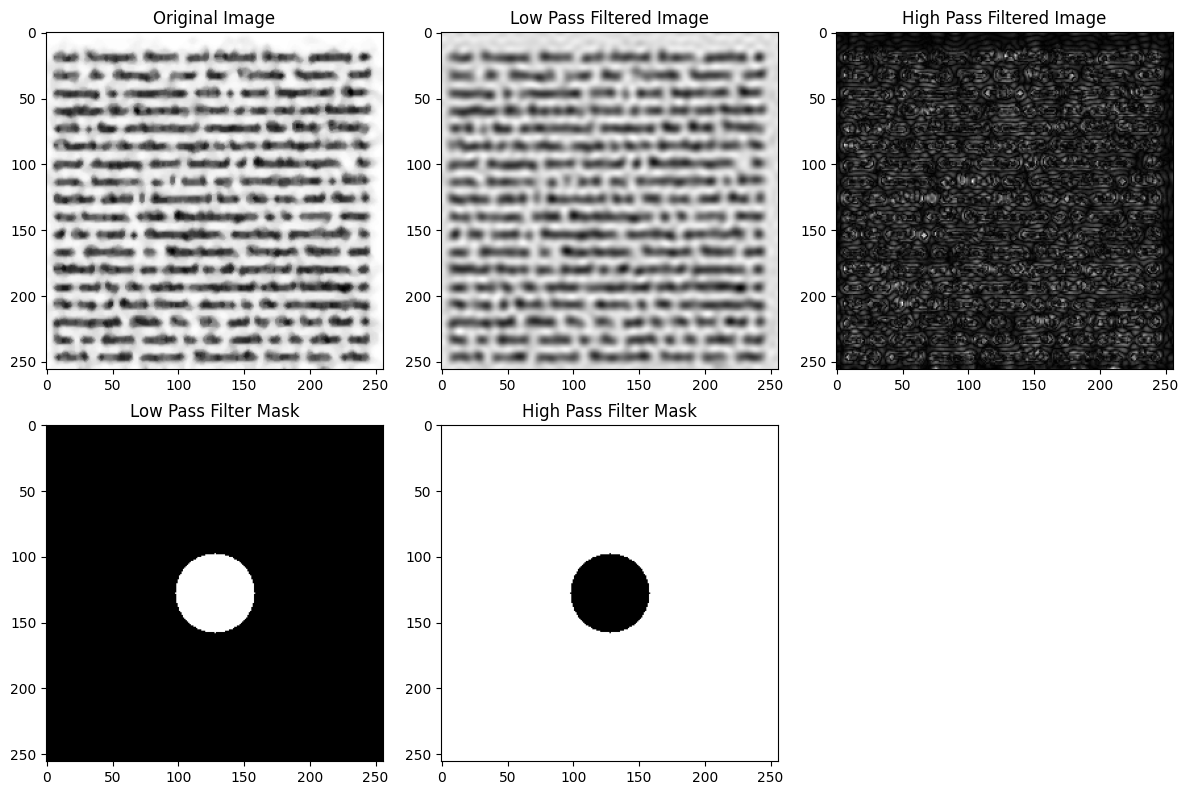

Workers.jpg


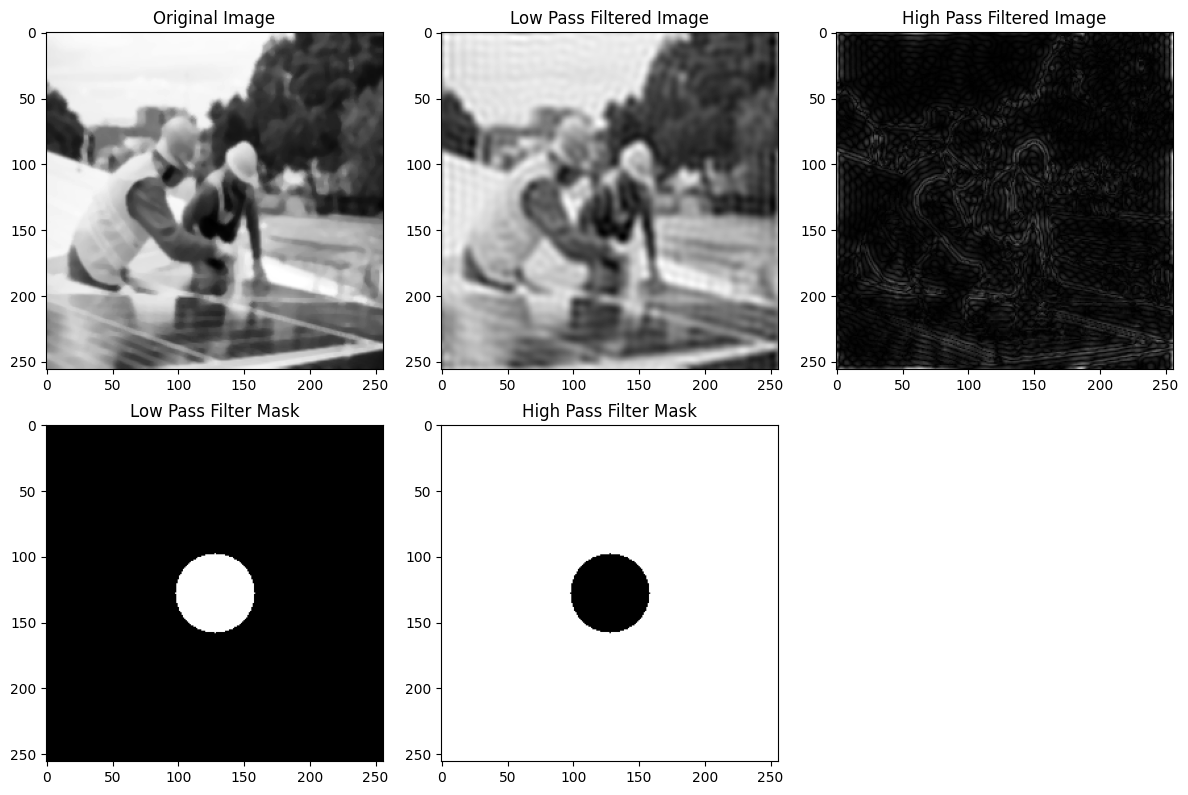

In [ ]:
# Instructions
# 1. For the images provided, perform the low pass and high pass filtering operations in frequency domain.
#  Show all the steps during coding. Also display the frequency domain version of low pass and high pass filters.
# 2. In the second part of the assignment, students will perform research and learn how to perform binary and 
# adaptive thresholding to improve the visibility of text in image Text.png. For thresholding you will
#  explore cv2.threshold() and cv2.adaptiveThreshold() functions of OpenCV.

# Import necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage as sk
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim

# Function to apply low pass filter in frequency domain
def low_pass_filter(img, size):
    # Perform DFT (Discrete Fourier Transform) and shift the zero frequency component to the center
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Get image dimensions and calculate center
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create a mask with a circular area of ones at the center (low pass filter)
    mask = np.zeros((rows, cols, 2), np.float32)
    r = size
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
    mask[mask_area] = 1
    
    # Apply mask and inverse DFT to get the filtered image
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back, mask

# Function to apply high pass filter in frequency domain
def high_pass_filter(img, size):
    # Perform DFT (Discrete Fourier Transform) and shift the zero frequency component to the center
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Get image dimensions and calculate center
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create a mask with a circular area of zeros at the center (high pass filter)
    HPF = np.ones((rows, cols, 2), np.float32)
    r = size
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    HPF_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
    HPF[HPF_area] = 0
    
    # Apply mask and inverse DFT to get the filtered image
    fshift = dft_shift * HPF
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back, HPF

# Loop through all images in the current directory
for i in os.listdir('.'):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        print(i)
        # Read the image in grayscale mode
        img = cv2.imread(i, 0)
        # Resize the image to 256x256
        img = cv2.resize(img, (256, 256))
        # Apply Gaussian and median blur to the image
        img = cv2.GaussianBlur(img, (5, 5), 0)
        img = cv2.medianBlur(img, 5)

        # Apply low pass and high pass filters
        low_pass_img, low_pass_mask = low_pass_filter(img, 30)
        high_pass_img, high_pass_mask = high_pass_filter(img, 30)
        
        # Plotting the original and filtered images along with their masks
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')
        
        plt.subplot(2, 3, 2)
        plt.imshow(low_pass_img, cmap='gray')
        plt.title('Low Pass Filtered Image')
        
        plt.subplot(2, 3, 3)
        plt.imshow(high_pass_img, cmap='gray')
        plt.title('High Pass Filtered Image')
        
        plt.subplot(2, 3, 4)
        plt.imshow(low_pass_mask[:, :, 0], cmap='gray')
        plt.title('Low Pass Filter Mask')
        
        plt.subplot(2, 3, 5)
        plt.imshow(high_pass_mask[:, :, 0], cmap='gray')
        plt.title('High Pass Filter Mask')
        
        plt.tight_layout()
        plt.show()


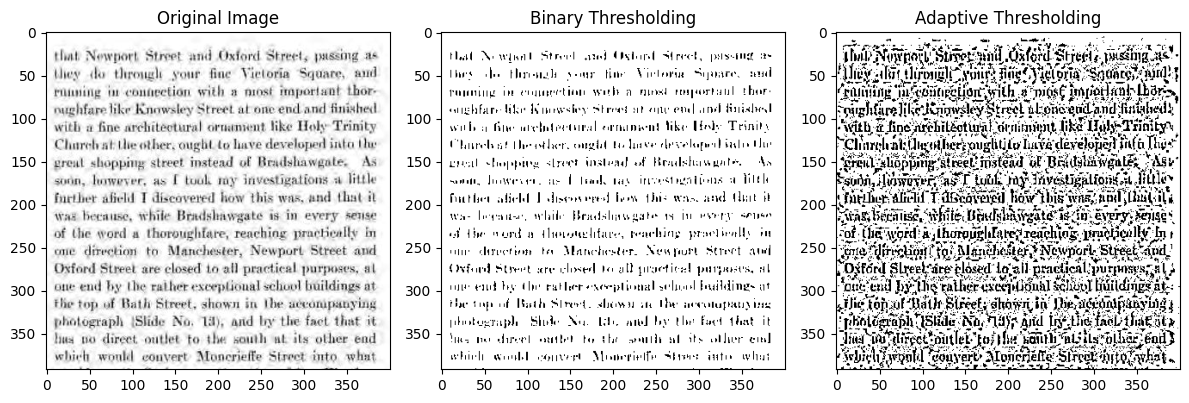

In [ ]:
# 2. In the second part of the assignment, students will perform research and learn how to perform binary and 
# adaptive thresholding to improve the visibility of text in image Text.png. For thresholding you will
# explore cv2.threshold() and cv2.adaptiveThreshold() functions of OpenCV.

# Load the image in grayscale mode
text_img = cv2.imread('Text.png', 0)

# Apply binary thresholding
# cv2.threshold() returns two values: the threshold used and the thresholded image
# We use a threshold value of 128, and any pixel value above this will be set to 255 (white), otherwise 0 (black)
_, binary_thresh = cv2.threshold(text_img, 128, 255, cv2.THRESH_BINARY)

# Apply adaptive thresholding
# cv2.adaptiveThreshold() calculates the threshold for smaller regions of the image
# This is useful for images with varying lighting conditions
# We use a block size of 11 and a constant C of 2
adaptive_thresh = cv2.adaptiveThreshold(text_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plot the original and thresholded images
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(text_img, cmap='gray')
plt.title('Original Image')

# Display the binary thresholded image
plt.subplot(1, 3, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title('Binary Thresholding')

# Display the adaptive thresholded image
plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
